<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/NHS_Accident_%26_Emergency_(A%26E)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
monthly = pd.read_excel('/content/sample_data/Monthly A&E July 2024.xlsx')
monthly_timeseries = pd.read_excel('/content/sample_data/Monthly A&E Time Series July 2024 .xlsx')

In [3]:
monthly.head()

,Code,Region,Name,Type 1 Departments - Major A&E,Type 2 Departments - Single Specialty,Type 3 Departments - Other A&E/Minor Injury Unit,Total attendances,Type 1 Departments - Major A&E.1,Type 2 Departments - Single Specialty.1,Type 3 Departments - Other A&E/Minor Injury Unit.1,Total Attendances < 4 hours,Type 1 Departments - Major A&E.2,Type 2 Departments - Single Specialty.2,Type 3 Departments - Other A&E/Minor Injury Unit.2,Total Attendances > 4 hours,A&E attendances,A&E attendances > 4 hours,Percentage in 4 hours or less (type 1) before mapping,Percentage in 4 hours or less (all) before mapping,Percentage in 4 hours or less (all) with additional mapped activity
0,RC9,NHS England East Of England,Bedfordshire Hospitals NHS Foundation Trust,16511,0,11680.0,28191.0,10420,0,11680.0,22100.0,6091,0,0.0,6091.0,2802.0,0.0,0.631094,0.760093,0.783938
1,RGT,NHS England East Of England,Cambridge University Hospitals NHS Foundation ...,10759,0,6654.0,17413.0,5588,0,6582.0,12170.0,5171,0,72.0,5243.0,0.0,0.0,0.519379,0.698903,0.698903
2,RWH,NHS England East Of England,East And North Hertfordshire NHS Trust,9438,0,9652.0,19090.0,4463,0,9460.0,13923.0,4975,0,192.0,5167.0,2464.0,135.0,0.472876,0.697342,0.729335
3,RDE,NHS England East Of England,East Suffolk And North Essex NHS Foundation Trust,15819,0,12272.0,28091.0,8621,0,12104.0,20725.0,7198,0,168.0,7366.0,0.0,0.0,0.544978,0.737781,0.737781
4,RGP,NHS England East Of England,James Paget University Hospitals NHS Foundatio...,7844,0,1338.0,9182.0,4785,0,1338.0,6123.0,3059,0,0.0,3059.0,0.0,0.0,0.61002,0.666848,0.666848


In [4]:
monthly_timeseries.head()

,Period,Type 1 Departments - Major A&E,Type 2 Departments - Single Specialty,Type 3 Departments - Other A&E/Minor Injury Unit,Total Attendances,Emergency Admissions via Type 1 A&E,Emergency Admissions via Type 2 A&E,Emergency Admissions via Type 3 and 4 A&E,Total Emergency Admissions via A&E,Other Emergency Admissions (i.e not via A&E),Total Emergency Admissions,Number of patients spending >4 hours from decision to admit to admission,Number of patients spending >12 hours from decision to admit to admission
0,2010-08-01,1.138652e+06,54371.000000,559358.000000,1.752381e+06,287438.000000,5367.000000,8081.000000,300886.000000,124816.000000,425702.000000,3697.000000,1.0
1,2010-09-01,1.150728e+06,55181.000000,550359.000000,1.756268e+06,293991.000000,5543.000000,3673.000000,303207.000000,121693.000000,424900.000000,5907.000000,0.0
2,2010-10-01,1.163143e+06,54961.000000,583244.000000,1.801348e+06,303452.000000,5485.000000,2560.000000,311497.000000,124718.000000,436215.000000,6932.000000,0.0
3,2010-11-01,1.111295e+06,53727.428571,486005.428571,1.651027e+06,297832.000000,5731.142857,3279.000000,306842.142857,122256.857143,429099.000000,7179.000000,2.0
4,2010-12-01,1.159204e+06,45536.428571,533000.857143,1.737741e+06,318602.428571,6277.000000,3198.428571,328077.857143,124650.857143,452728.714286,13818.142857,15.0


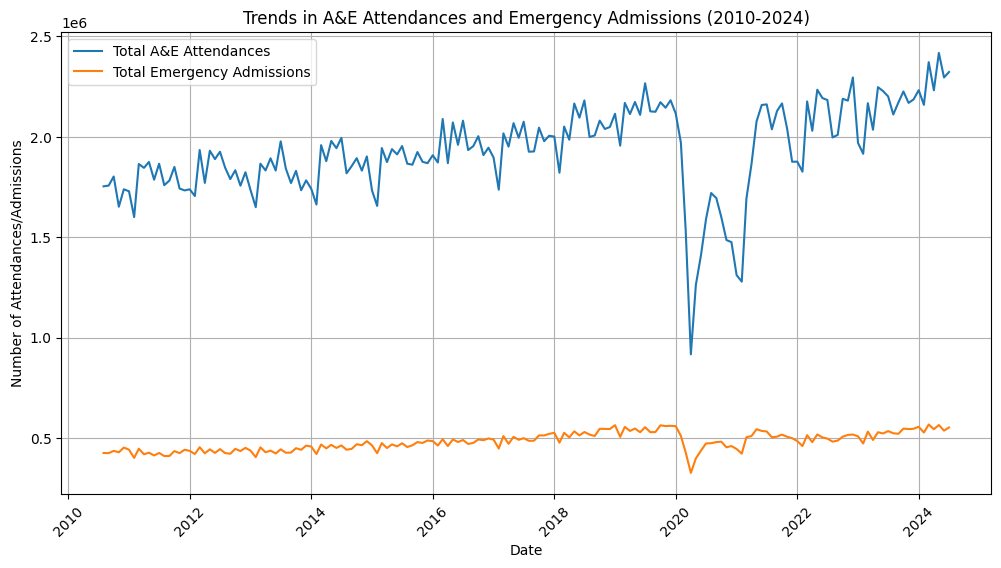

In [5]:
# Plotting the trends in total A&E attendances and emergency admissions

plt.figure(figsize=(12, 6))

# Total A&E Attendances
sns.lineplot(data=monthly_timeseries, x='Period', y='Total Attendances', label='Total A&E Attendances')
# Total Emergency Admissions
sns.lineplot(data=monthly_timeseries, x='Period', y='Total Emergency Admissions', label='Total Emergency Admissions')

plt.title('Trends in A&E Attendances and Emergency Admissions (2010-2024)')
plt.xlabel('Date')
plt.ylabel('Number of Attendances/Admissions')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


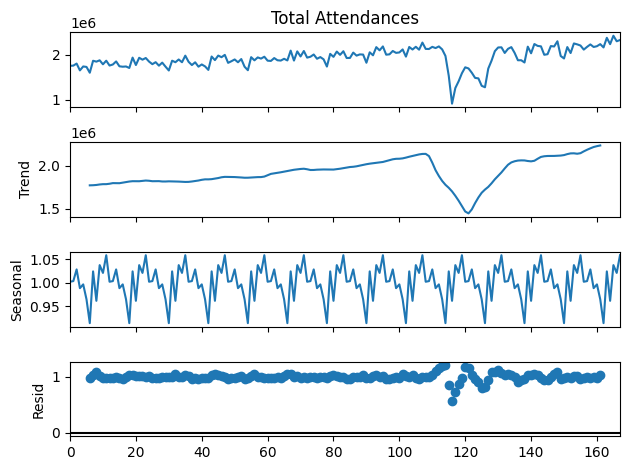

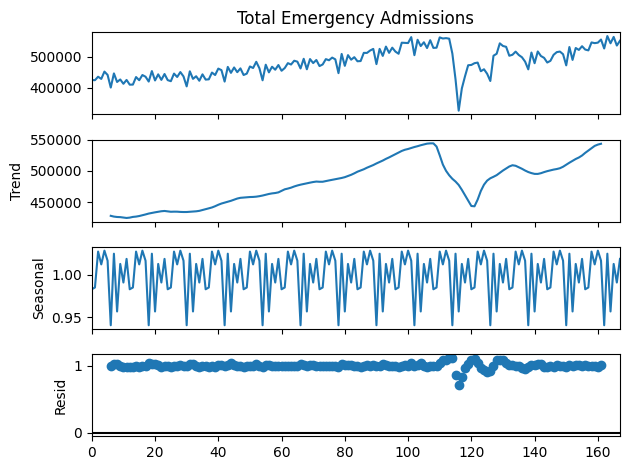

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series data for Total A&E Attendances
result = seasonal_decompose(monthly_timeseries['Total Attendances'], model='multiplicative', period=12)
result.plot()
plt.show()

# Decomposing the time series data for Total Emergency Admissions
result = seasonal_decompose(monthly_timeseries['Total Emergency Admissions'], model='multiplicative', period=12)
result.plot()
plt.show()


In [8]:
from statsmodels.tsa.arima.model import ARIMA

# For simplicity, let's assume we are focusing on Total Attendances for forecasting

# Fitting an ARIMA model to the data
model = ARIMA(monthly_timeseries['Total Attendances'], order=(5, 1, 0))
model_fit = model.fit()

In [9]:
# Forecasting the next 12 months
forecast = model_fit.forecast(steps=12)
print(forecast)

168    2.296741e+06
169    2.301881e+06
170    2.302219e+06
171    2.307446e+06
172    2.307647e+06
173    2.308241e+06
174    2.307302e+06
175    2.306859e+06
176    2.306573e+06
177    2.306635e+06
178    2.306744e+06
179    2.306851e+06
Name: predicted_mean, dtype: float64


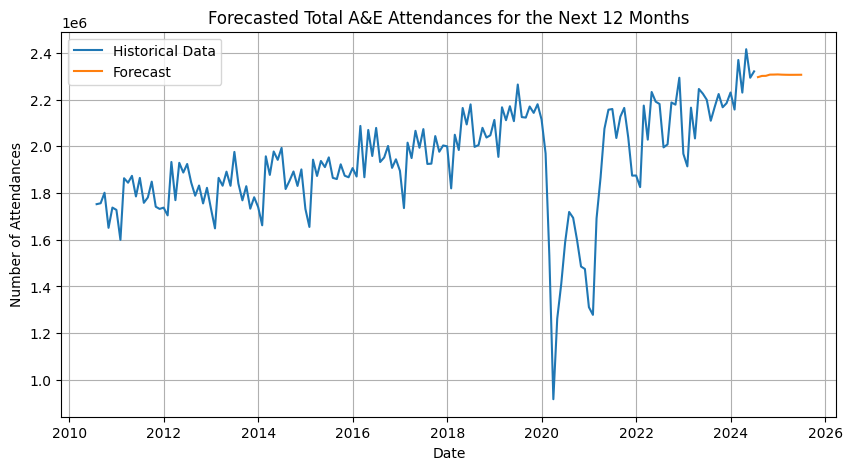

In [10]:
# Plotting the forecast
plt.figure(figsize=(10, 5))
plt.plot(monthly_timeseries['Period'], monthly_timeseries['Total Attendances'], label='Historical Data')
plt.plot(pd.date_range(start=monthly_timeseries['Period'].iloc[-1], periods=12, freq='M'), forecast, label='Forecast')
plt.title('Forecasted Total A&E Attendances for the Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Number of Attendances')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
monthly_timeseries['Rolling Average'] = monthly_timeseries['Total Attendances'].rolling(window=12).mean()

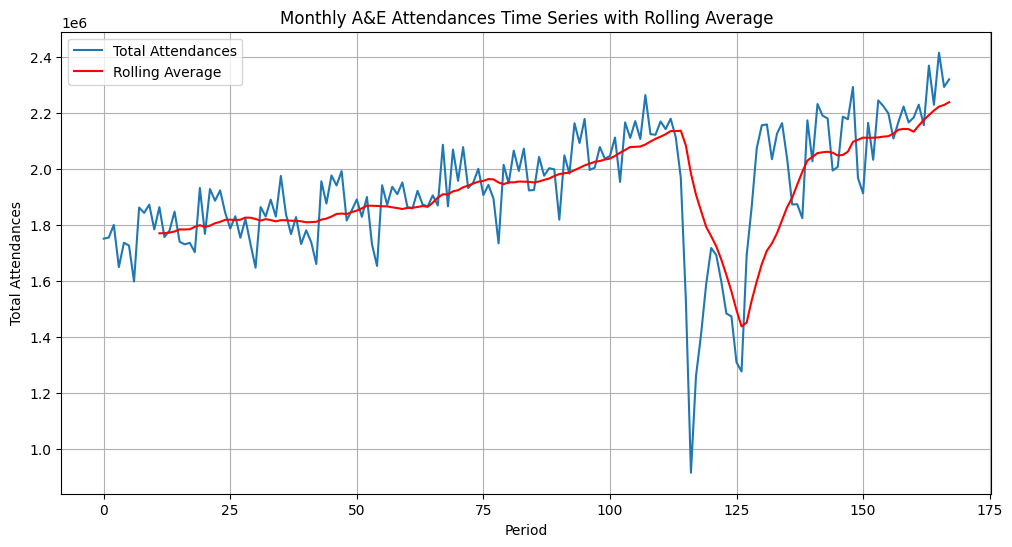

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_timeseries['Total Attendances'], label='Total Attendances') # removed extra indent
plt.plot(monthly_timeseries['Rolling Average'], label='Rolling Average', color='red')
plt.xlabel('Period')
plt.ylabel('Total Attendances')
plt.title('Monthly A&E Attendances Time Series with Rolling Average')
plt.legend()
plt.grid(True)
plt.show()

1. Correlation Analysis

Purpose: To understand the relationship between different variables (e.g., attendances and admissions, specific departments, time of day/week/year).

                                                      Period  \
Period                                              1.000000   
Type 1 Departments - Major A&E                      0.462924   
Type 2 Departments - Single Specialty              -0.660141   
Type 3 Departments - Other A&E/Minor Injury Unit    0.466535   
Total Attendances                                   0.447188   
Emergency Admissions via Type 1 A&E                 0.776198   
Emergency Admissions via Type 2 A&E                -0.498306   
Emergency Admissions via Type 3 and 4 A&E           0.652171   
Total Emergency Admissions via A&E                  0.775594   
Other Emergency Admissions (i.e not via A&E)        0.276837   
Total Emergency Admissions                          0.706168   
Number of patients spending >4 hours from decis...  0.890162   
Number of patients spending >12 hours from deci...  0.687606   
Rolling Average                                     0.506244   

                                       

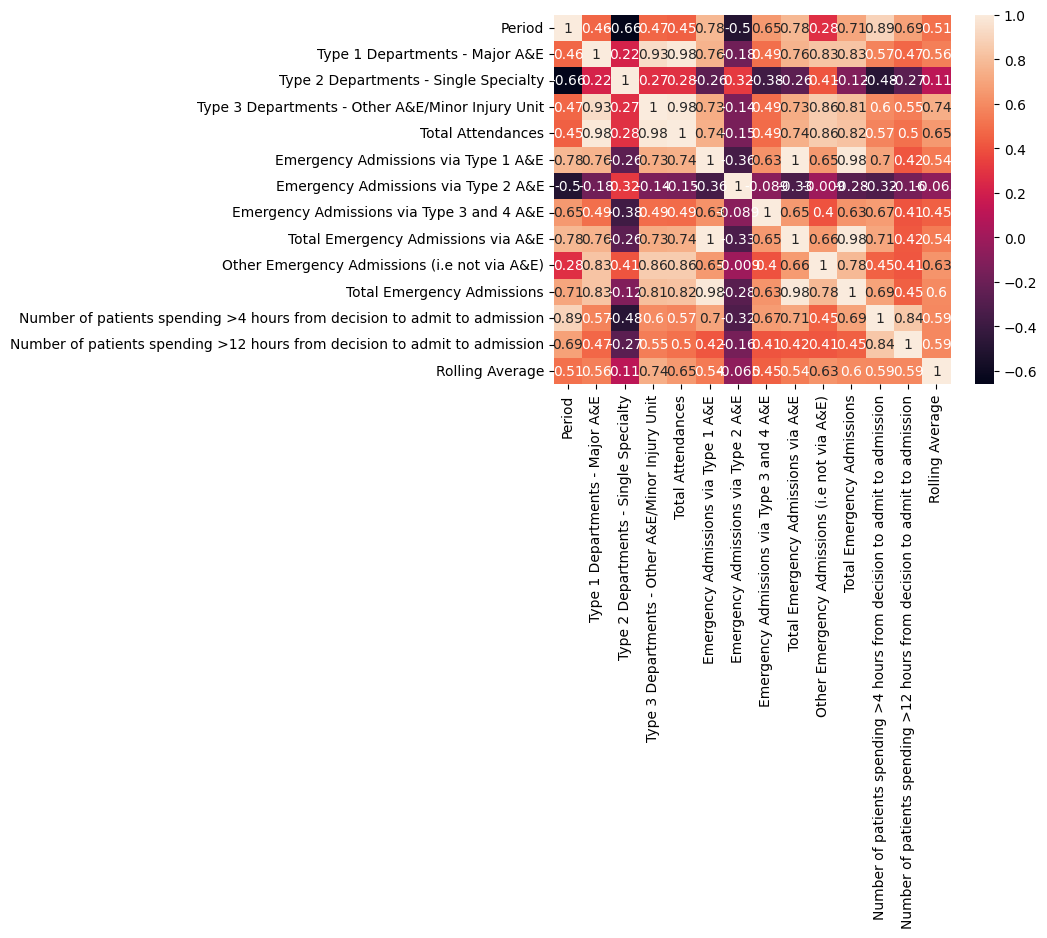

In [ ]:
import pandas as pd

# Assuming your data is in a DataFrame named 'df'
# and has columns like 'Total Attendances', 'Emergency Admissions', etc.

# Calculate the correlation matrix
correlation_matrix = monthly_timeseries.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True)
plt.show()

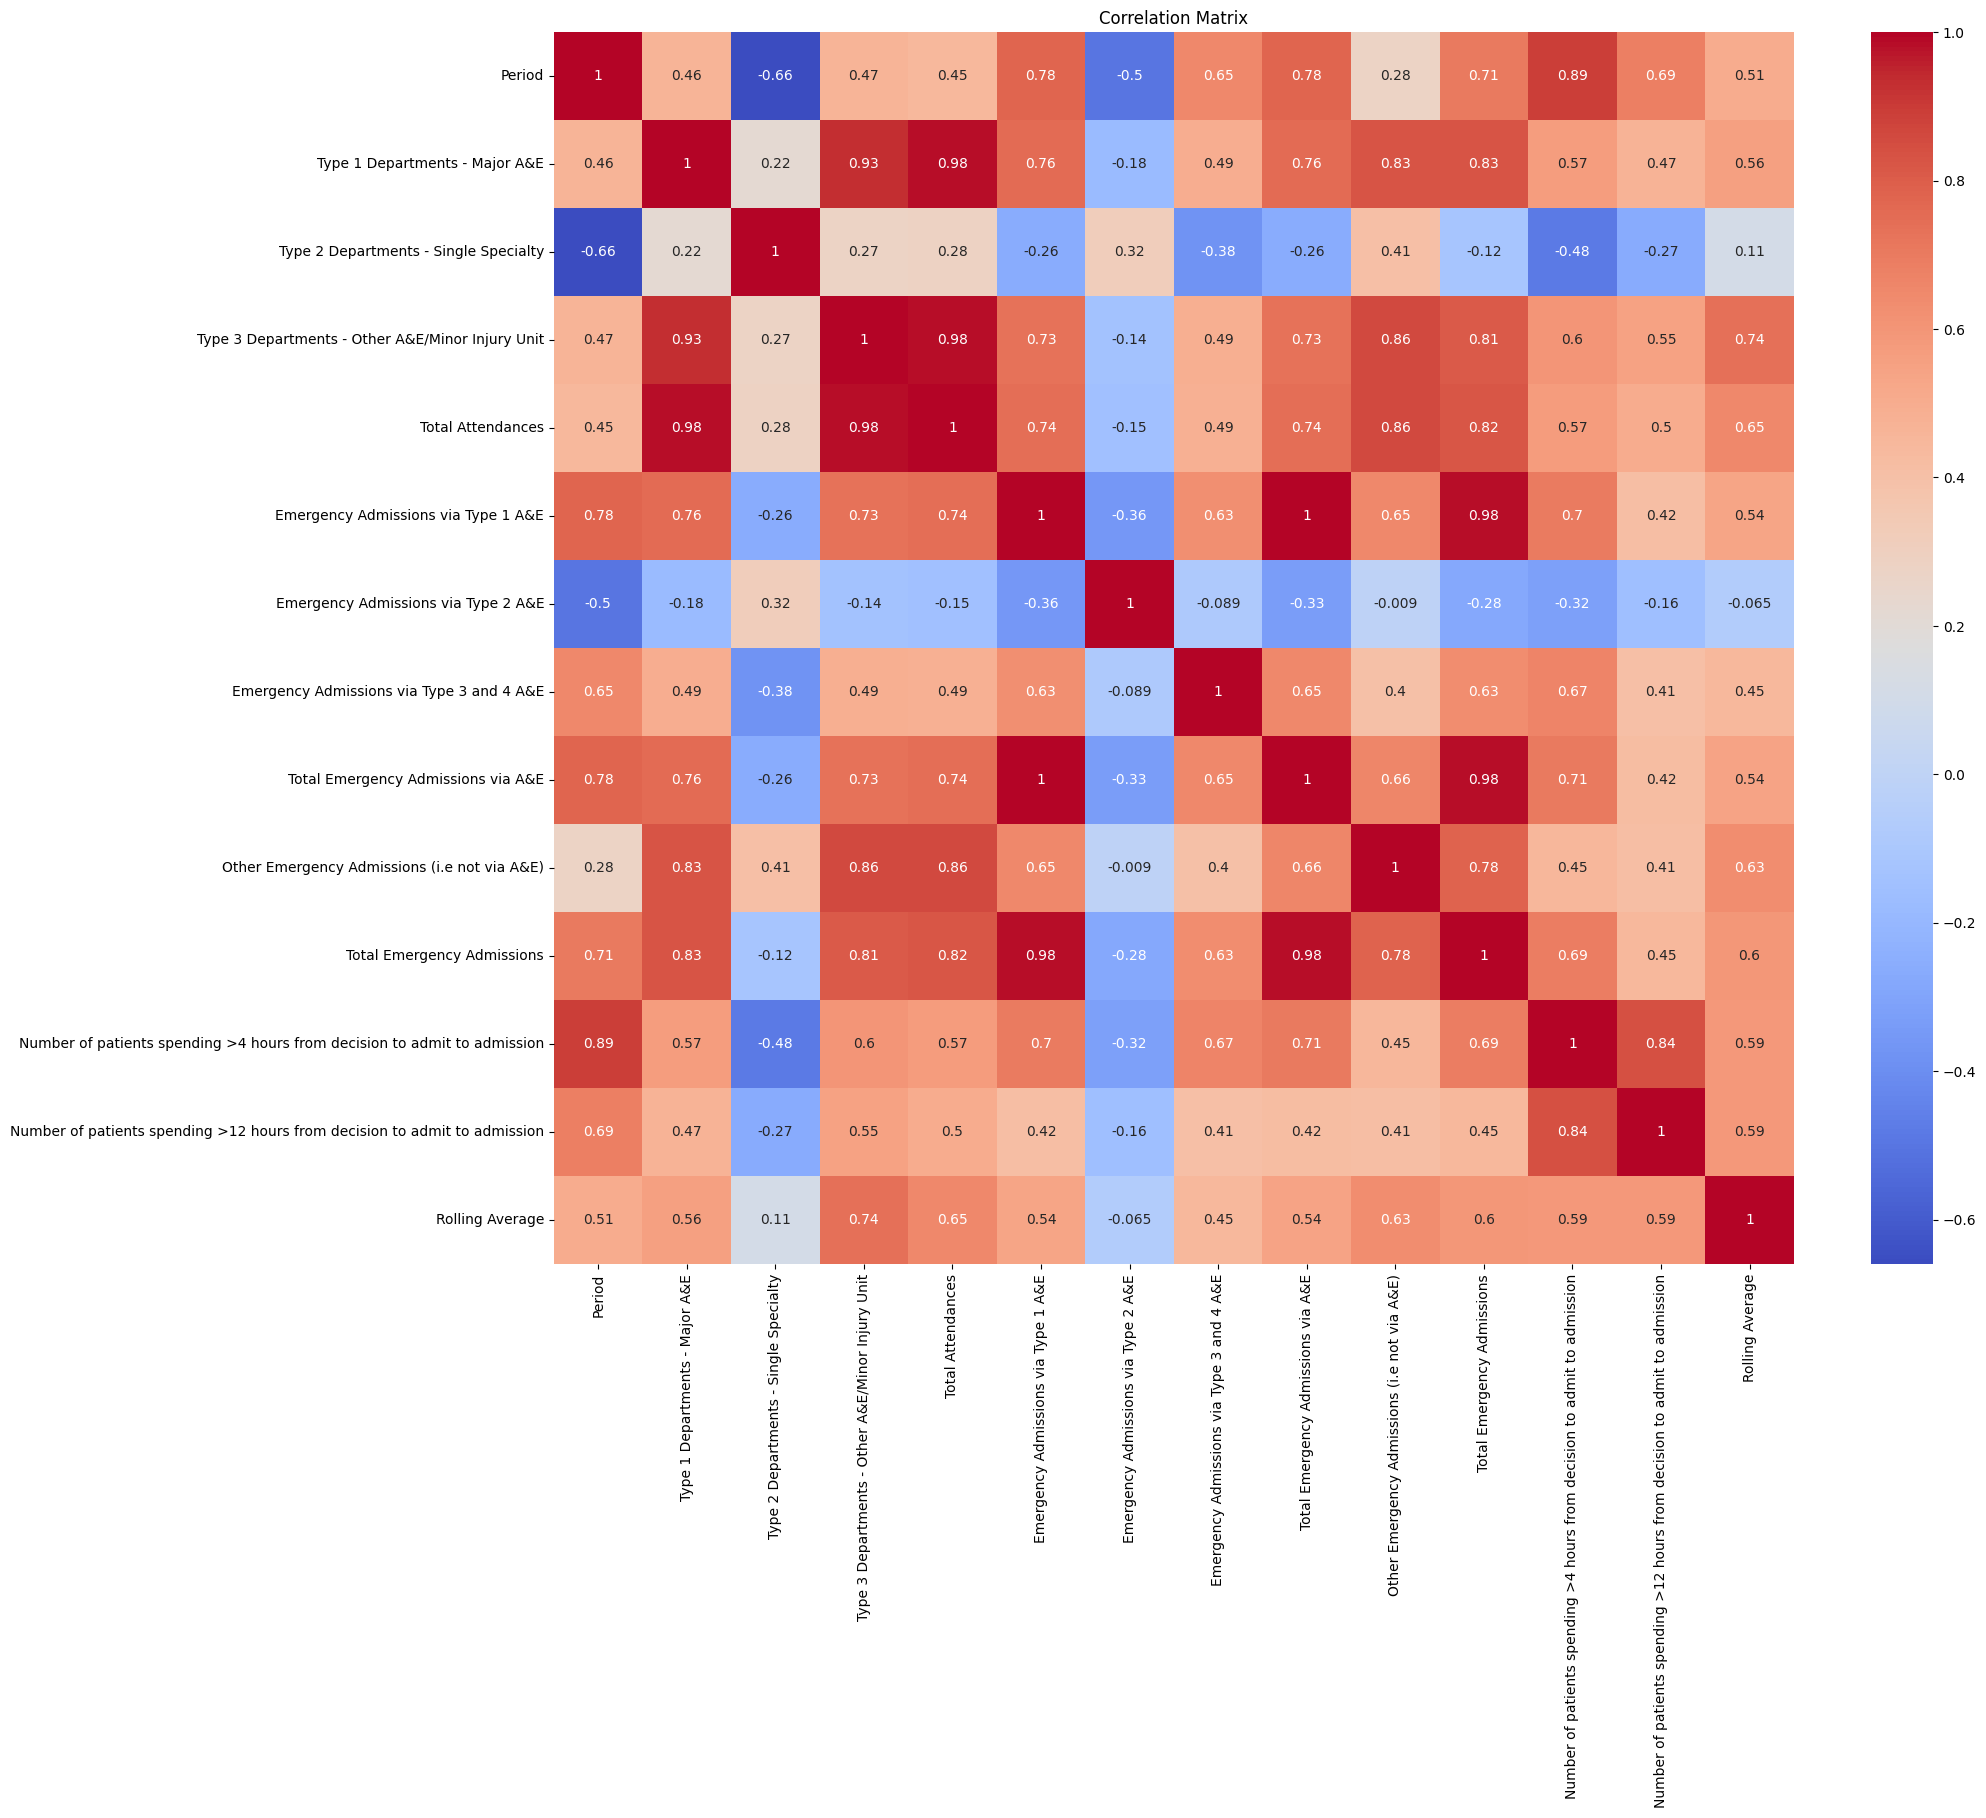

In [ ]:
# prompt: make the correlation matrix a big one so that i can be seen

# Increase the figure size for better visibility
plt.figure(figsize=(20, 16))  # Adjust the values as needed

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 2. Time Series Decomposition

Purpose: To break down time series data (like your 'monthly_timeseries' DataFrame) into its core components: trend, seasonality, and residuals (noise). This helps identify patterns like increasing/decreasing trends, repeating seasonal patterns, and outliers.

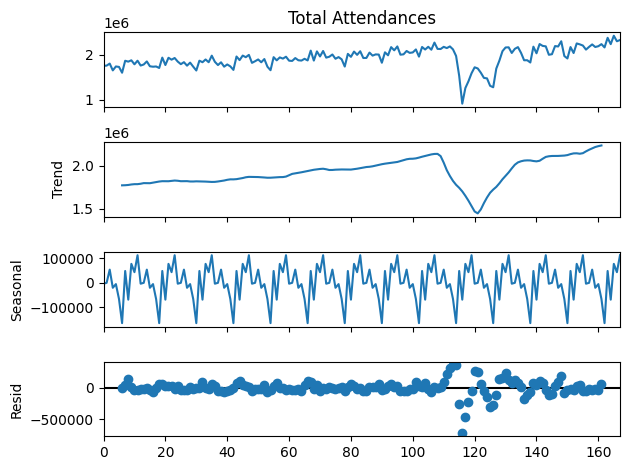

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'Total Attendances' is your time series data
result = seasonal_decompose(monthly_timeseries['Total Attendances'], model='additive', period=12)

# Plot the decomposed components
result.plot()
plt.show()

# 4. Trend Lines and Regression

Purpose: Fit trend lines to your data to visualize and quantify the overall direction of the trend. Linear or polynomial regression can be used.

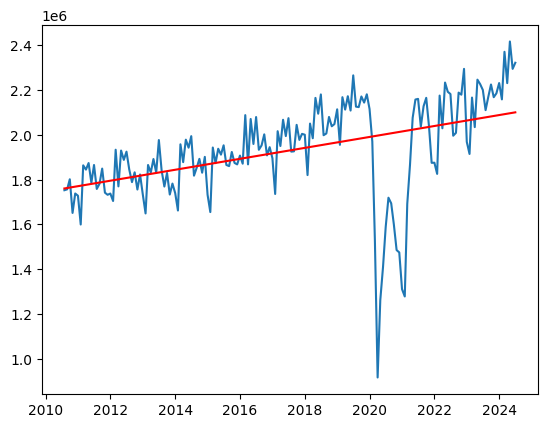

In [ ]:

import numpy as np
from sklearn.linear_model import LinearRegression

# Convert 'Period' to ordinal values for numerical representation
X = monthly_timeseries['Period'].map(pd.to_datetime).map(lambda x: x.toordinal()).values.reshape(-1, 1)
y = monthly_timeseries['Total Attendances']

model = LinearRegression()
model.fit(X, y)

trend_line = model.predict(X)

# Plot the data and the trend line
plt.plot(monthly_timeseries['Period'], monthly_timeseries['Total Attendances'])
plt.plot(monthly_timeseries['Period'], trend_line, color='red')
plt.show()

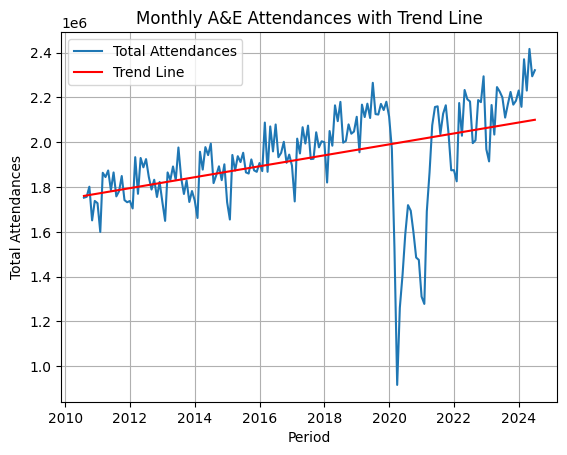

In [ ]:
plt.plot(monthly_timeseries['Period'], monthly_timeseries['Total Attendances'], label='Total Attendances')
plt.plot(monthly_timeseries['Period'], trend_line, color='red', label='Trend Line')
plt.xlabel('Period')
plt.ylabel('Total Attendances')
plt.title('Monthly A&E Attendances with Trend Line')
plt.legend()
plt.grid(True)
plt.show()


# 1. Trend of Total Attendances Over Time

Analysis: Visualize the overall trend of total attendances using a line plot and potentially a trend line (as shown in the previous response).
Code: (Same as the trend line example in the previous response)
2. Comparison of Attendance Types

Analysis: Compare the trends of attendances across the different department types (Type 1, Type 2, Type 3).

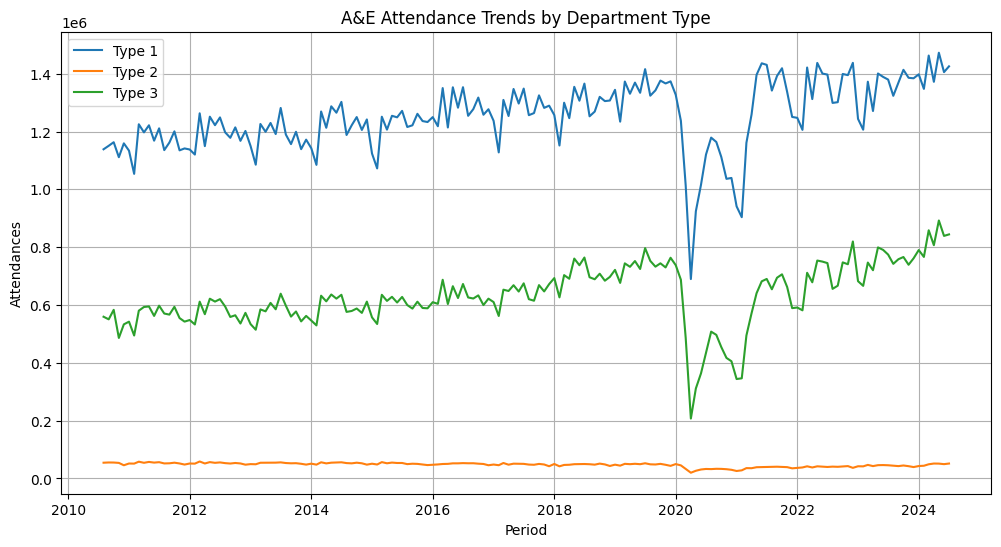

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_timeseries['Period'], monthly_timeseries['Type 1 Departments - Major A&E'], label='Type 1')
plt.plot(monthly_timeseries['Period'], monthly_timeseries['Type 2 Departments - Single Specialty'], label='Type 2')
plt.plot(monthly_timeseries['Period'], monthly_timeseries['Type 3 Departments - Other A&E/Minor Injury Unit'], label='Type 3')
plt.xlabel('Period')
plt.ylabel('Attendances')
plt.title('A&E Attendance Trends by Department Type')
plt.legend()
plt.grid(True)
plt.show()

# 3. Relationship Between Attendances and Admissions

Analysis: Investigate the correlation between total attendances and total emergency admissions. You can use a scatter plot and calculate the correlation coefficient.

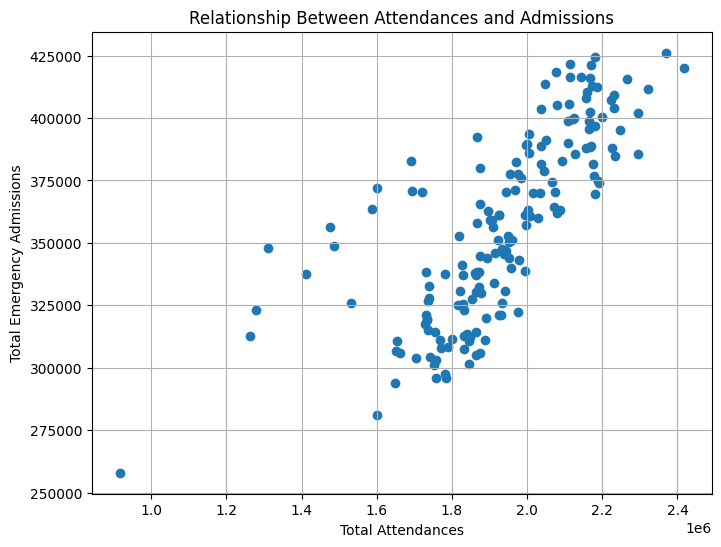

Correlation coefficient: 0.7443436224841619


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(monthly_timeseries['Total Attendances'], monthly_timeseries['Total Emergency Admissions via A&E'])
plt.xlabel('Total Attendances')
plt.ylabel('Total Emergency Admissions')
plt.title('Relationship Between Attendances and Admissions')
plt.grid(True)
plt.show()

correlation = monthly_timeseries['Total Attendances'].corr(monthly_timeseries['Total Emergency Admissions via A&E'])
print(f"Correlation coefficient: {correlation}")

# 4. Emergency Admissions Breakdown

Analysis: Analyze the proportion of emergency admissions coming from each department type (Type 1, Type 2, Type 3 and 4). You can use a stacked bar chart to visualize this.

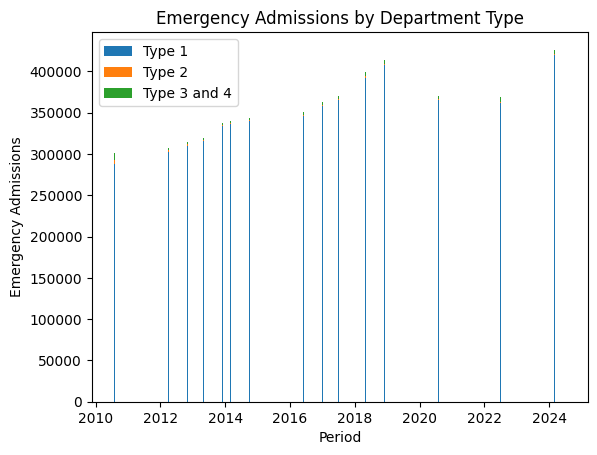

In [ ]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
periods = monthly_timeseries['Period']
type1 = monthly_timeseries['Emergency Admissions via Type 1 A&E']
type2 = monthly_timeseries['Emergency Admissions via Type 2 A&E']
type3 = monthly_timeseries['Emergency Admissions via Type 3 and 4 A&E']

plt.bar(periods, type1, label='Type 1')
plt.bar(periods, type2, bottom=type1, label='Type 2')
plt.bar(periods, type3, bottom=type1 + type2, label='Type 3 and 4')

plt.xlabel('Period')
plt.ylabel('Emergency Admissions')
plt.title('Emergency Admissions by Department Type')
plt.legend()
plt.show()

# 5. Analysis of Waiting Times

Analysis: Explore the trend of patients spending more than 4 hours in A&E. Calculate the average waiting time over time or potentially identify periods with unusually high waiting times.

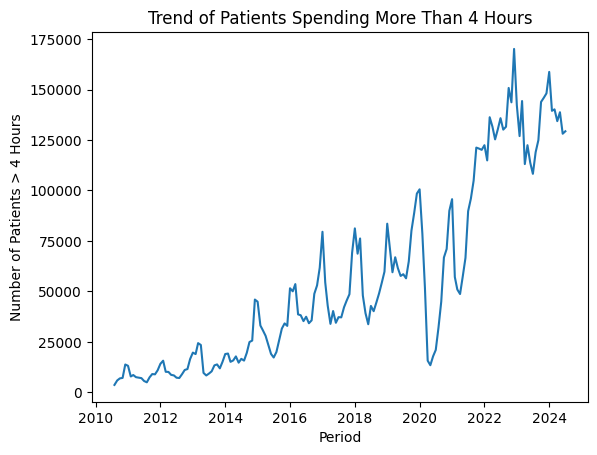

In [ ]:
import matplotlib.pyplot as plt

plt.plot(monthly_timeseries['Period'], monthly_timeseries['Number of patients spending >4 hours from decision to admit to admission'])
plt.xlabel('Period')
plt.ylabel('Number of Patients > 4 Hours')
plt.title('Trend of Patients Spending More Than 4 Hours')
plt.show()

# Calculate average waiting time over the entire period (if you have the data for it)
# average_waiting_time = df['Waiting Time'].mean()

In [11]:
# Convert the 'Period' column to datetime format and set it as the index
monthly_timeseries['Period'] = pd.to_datetime(monthly_timeseries['Period'], format='%Y-%m')
monthly_timeseries.set_index('Period', inplace=True)

In [12]:
# Display the first few rows to confirm the change
monthly_timeseries.head()


,Type 1 Departments - Major A&E,Type 2 Departments - Single Specialty,Type 3 Departments - Other A&E/Minor Injury Unit,Total Attendances,Emergency Admissions via Type 1 A&E,Emergency Admissions via Type 2 A&E,Emergency Admissions via Type 3 and 4 A&E,Total Emergency Admissions via A&E,Other Emergency Admissions (i.e not via A&E),Total Emergency Admissions,Number of patients spending >4 hours from decision to admit to admission,Number of patients spending >12 hours from decision to admit to admission
Period,,,,,,,,,,,,
2010-08-01,1.138652e+06,54371.000000,559358.000000,1.752381e+06,287438.000000,5367.000000,8081.000000,300886.000000,124816.000000,425702.000000,3697.000000,1.0
2010-09-01,1.150728e+06,55181.000000,550359.000000,1.756268e+06,293991.000000,5543.000000,3673.000000,303207.000000,121693.000000,424900.000000,5907.000000,0.0
2010-10-01,1.163143e+06,54961.000000,583244.000000,1.801348e+06,303452.000000,5485.000000,2560.000000,311497.000000,124718.000000,436215.000000,6932.000000,0.0
2010-11-01,1.111295e+06,53727.428571,486005.428571,1.651027e+06,297832.000000,5731.142857,3279.000000,306842.142857,122256.857143,429099.000000,7179.000000,2.0
2010-12-01,1.159204e+06,45536.428571,533000.857143,1.737741e+06,318602.428571,6277.000000,3198.428571,328077.857143,124650.857143,452728.714286,13818.142857,15.0
